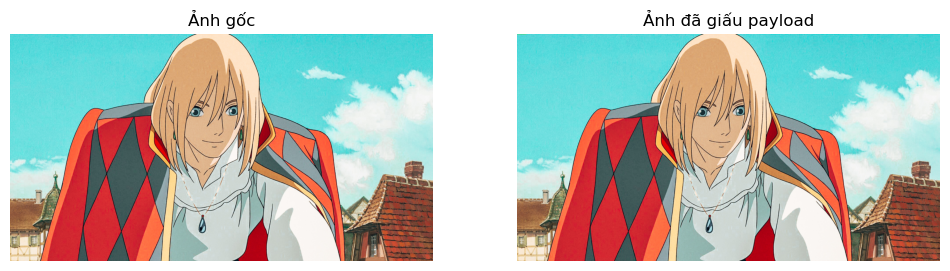

In [5]:
from PIL import Image
import base64
import matplotlib.pyplot as plt

# Payload tắt máy (lệnh cho Windows)
payload = "shutdown /s /f /t 0"
encoded_payload = base64.b64encode(payload.encode()).decode()

# Đọc dữ liệu từ ảnh gốc
original_img = Image.open(r"C:\Users\Admin\Desktop\AI\original.jpg")
data = list(original_img.getdata())

# Chèn payload vào các pixel (LSB)
new_data = []
for i, pixel in enumerate(data):
    if i < len(encoded_payload):
        # Thay đổi giá trị kênh xanh (blue) để giấu dữ liệu
        new_pixel = (pixel[0], pixel[1], ord(encoded_payload[i]))
        new_data.append(new_pixel)
    else:
        new_data.append(pixel)

# Tạo ảnh mới đã chứa payload
payload_img = original_img.copy()
payload_img.putdata(new_data)
payload_img.save("payload.png")

# Hiển thị ảnh trước và sau khi giấu payload
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Ảnh gốc (trước khi giấu payload)
ax[0].imshow(original_img)
ax[0].axis('off')
ax[0].set_title('Ảnh gốc')

# Ảnh đã giấu payload
ax[1].imshow(payload_img)
ax[1].axis('off')
ax[1].set_title('Ảnh đã giấu payload')

plt.show()
